* Importing Liberaris

In [22]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from scipy.stats import norm
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix , classification_report , f1_score
import warnings as w
w.filterwarnings("ignore")

* Loading dataset

In [2]:
path = "G:\\Data Field\\D..S..Course\\data.sc.Asem\\Data\Data\\2.10 Ensemble Classifier\\heart.csv"
data = pd.read_csv(path)
data

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [3]:
# Present Columns

data.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

* Present data info

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
age         303 non-null int64
sex         303 non-null int64
cp          303 non-null int64
trestbps    303 non-null int64
chol        303 non-null int64
fbs         303 non-null int64
restecg     303 non-null int64
thalach     303 non-null int64
exang       303 non-null int64
oldpeak     303 non-null float64
slope       303 non-null int64
ca          303 non-null int64
thal        303 non-null int64
target      303 non-null int64
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


* Preset description of data

In [5]:
data.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


* Get the correlation mong Features and output

In [6]:
C_M = data.corr()
C_M

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
age,1.000000,-0.098447,-0.068653,0.279351,0.213678,0.121308,-0.116211,-0.398522,0.096801,0.210013,-0.168814,0.276326,0.068001,-0.225439
sex,-0.098447,1.000000,-0.049353,-0.056769,-0.197912,0.045032,-0.058196,-0.044020,0.141664,0.096093,-0.030711,0.118261,0.210041,-0.280937
cp,-0.068653,-0.049353,1.000000,0.047608,-0.076904,0.094444,0.044421,0.295762,-0.394280,-0.149230,0.119717,-0.181053,-0.161736,0.433798
trestbps,0.279351,-0.056769,0.047608,1.000000,0.123174,0.177531,-0.114103,-0.046698,0.067616,0.193216,-0.121475,0.101389,0.062210,-0.144931
chol,0.213678,-0.197912,-0.076904,0.123174,1.000000,0.013294,-0.151040,-0.009940,0.067023,0.053952,-0.004038,0.070511,0.098803,-0.085239
fbs,0.121308,0.045032,0.094444,0.177531,0.013294,1.000000,-0.084189,-0.008567,0.025665,0.005747,-0.059894,0.137979,-0.032019,-0.028046
restecg,-0.116211,-0.058196,0.044421,-0.114103,-0.151040,-0.084189,1.000000,0.044123,-0.070733,-0.058770,0.093045,-0.072042,-0.011981,0.137230
thalach,-0.398522,-0.044020,0.295762,-0.046698,-0.009940,-0.008567,0.044123,1.000000,-0.378812,-0.344187,0.386784,-0.213177,-0.096439,0.421741
exang,0.096801,0.141664,-0.394280,0.067616,0.067023,0.025665,-0.070733,-0.378812,1.000000,0.288223,-0.257748,0.115739,0.206754,-0.436757
oldpeak,0.210013,0.096093,-0.149230,0.193216,0.053952,0.005747,-0.058770,-0.344187,0.288223,1.000000,-0.577537,0.222682,0.210244,-0.430696


* Get The Strog Correlated Features

In [7]:
k = 5
S_C_M = C_M.nlargest( k , "target")["target"].index
S_C_M

Index(['target', 'cp', 'thalach', 'slope', 'restecg'], dtype='object')

In [8]:
cols = np.corrcoef(data[S_C_M].values.T)

* Visualize Coreelation usig heatmap

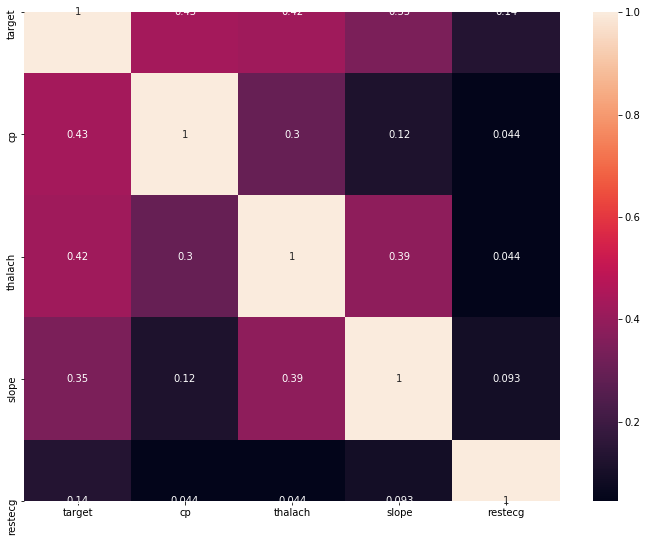

In [9]:
#sns.set(font_scale=1.25)
f , ax = plt.subplots(figsize = (12,9))
res = sns.heatmap(cols ,  annot = True  , xticklabels = S_C_M.values , yticklabels = S_C_M.values)

* Present Visualize Pairplot

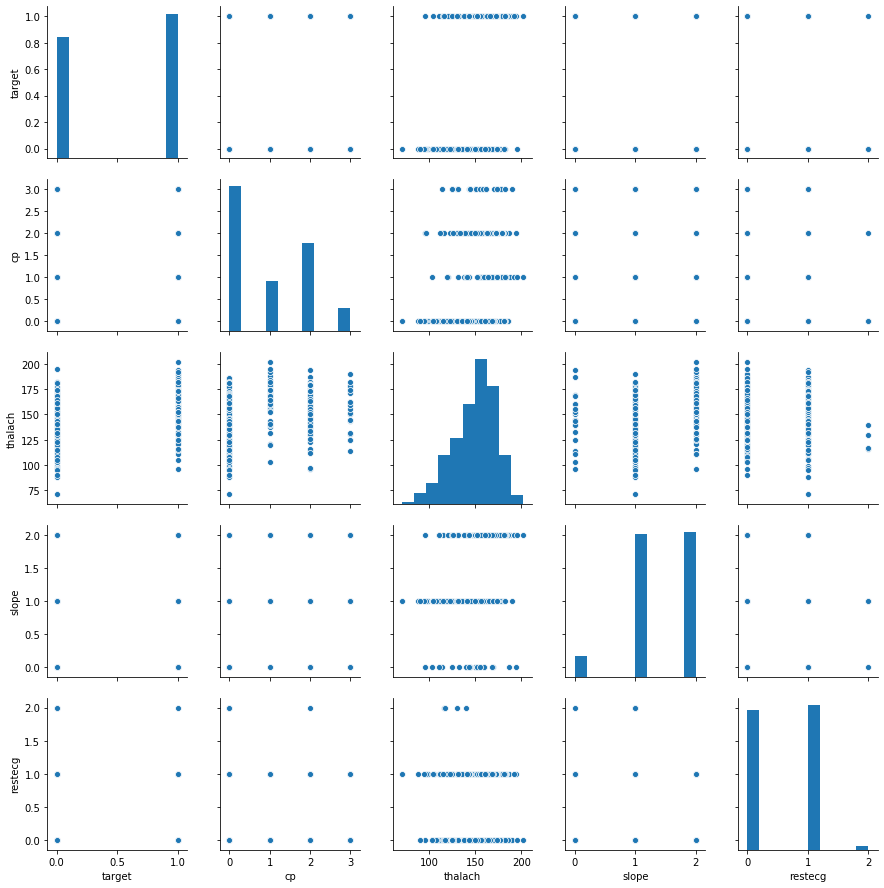

In [10]:
columns = ['target', 'cp', 'thalach', 'slope', 'restecg']
sns.pairplot(data[columns])

* Spliting data into input and output data

In [11]:
X = data.iloc[ : , : -1]
y = data.iloc[ : , -1]


In [12]:
X

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3


In [13]:
X.shape

(303, 13)

In [14]:
y

0      1
1      1
2      1
3      1
4      1
      ..
298    0
299    0
300    0
301    0
302    0
Name: target, Length: 303, dtype: int64

In [15]:
y.shape

(303,)

* Rescalling_data_input data only

In [16]:
Rescalling_data = StandardScaler()
X = Rescalling_data.fit_transform(X)


In [17]:
X

array([[ 0.9521966 ,  0.68100522,  1.97312292, ..., -2.27457861,
        -0.71442887, -2.14887271],
       [-1.91531289,  0.68100522,  1.00257707, ..., -2.27457861,
        -0.71442887, -0.51292188],
       [-1.47415758, -1.46841752,  0.03203122, ...,  0.97635214,
        -0.71442887, -0.51292188],
       ...,
       [ 1.50364073,  0.68100522, -0.93851463, ..., -0.64911323,
         1.24459328,  1.12302895],
       [ 0.29046364,  0.68100522, -0.93851463, ..., -0.64911323,
         0.26508221,  1.12302895],
       [ 0.29046364, -1.46841752,  0.03203122, ..., -0.64911323,
         0.26508221, -0.51292188]])

* Splliting_data into Train and test data

In [21]:
X_train ,X_test ,y_train ,y_test = train_test_split(X , y , test_size = 0.33 , random_state = 44 , shuffle = True)

* Applling Random Forest_Cladssfier

In [26]:
for i in range(50 , 500 , 50):
    Random_Forest_Classfier = RandomForestClassifier( criterion= "gini" , n_estimators=i , max_depth=3 , random_state=44)
    Random_Forest_Classfier.fit(X_train , y_train)
    Model_Trining_Score = Random_Forest_Classfier.score(X_train , y_train)
    Model_Testing_Score = Random_Forest_Classfier.score(X_test , y_test)
    Model_Classes = Random_Forest_Classfier.classes_
    Importance_feature = Random_Forest_Classfier.feature_importances_
    y_pred = Random_Forest_Classfier.predict(X_test)
    y_prob = Random_Forest_Classfier.predict_proba(X_test)
    Model_Classifier_Report = classification_report(y_test , y_pred)
    Conf_Matrix = confusion_matrix(y_test , y_pred)
    
    print(f"The n_Estimator :: {i}\n========\n\
The Importance_feature :: \n{Importance_feature}\n=======\nThe Model_Trining_Score :: \
{Model_Trining_Score}\n=====\nThe Model_Testing_Score :: {Model_Testing_Score}\n======\n\
The y_Test :: \n{y_test[:10]}\n=======\nThe y_pred ::\n{y_pred[:10]}\n========\nThe y_prob :: \n\
{y_prob[:10]}\nThe Conf_Matrix :: \n{Conf_Matrix}\n========\nThe Model_Classifier_Report :: {Model_Classifier_Report}")
    
    

The n_Estimator :: 50
The Importance_feature :: 
[0.07100045 0.0176214  0.1647172  0.04600965 0.02686918 0.00373051
 0.00479649 0.11796678 0.1158892  0.07600412 0.06150042 0.10310769
 0.19078691]
The Model_Trining_Score :: 0.8866995073891626
=====
The Model_Testing_Score :: 0.85
The y_Test :: 
94     1
54     1
261    0
172    0
44     1
12     1
95     1
111    1
225    0
198    0
Name: target, dtype: int64
The y_pred ::
[1 1 1 1 1 1 0 1 0 0]
The y_prob :: 
[[0.15909999 0.84090001]
 [0.20230968 0.79769032]
 [0.38259977 0.61740023]
 [0.28867466 0.71132534]
 [0.14273748 0.85726252]
 [0.12942116 0.87057884]
 [0.7080419  0.2919581 ]
 [0.46902325 0.53097675]
 [0.8326338  0.1673662 ]
 [0.93913486 0.06086514]]
The Conf_Matrix :: 
[[35 11]
 [ 4 50]]
The Model_Classifier_Report ::               precision    recall  f1-score   support

           0       0.90      0.76      0.82        46
           1       0.82      0.93      0.87        54

    accuracy                           0.85       10

The n_Estimator :: 450
The Importance_feature :: 
[0.05510011 0.02211478 0.15598256 0.04147642 0.03118398 0.00339279
 0.0073871  0.1004691  0.11940611 0.09384692 0.0839106  0.1126487
 0.17308082]
The Model_Trining_Score :: 0.8916256157635468
=====
The Model_Testing_Score :: 0.86
The y_Test :: 
94     1
54     1
261    0
172    0
44     1
12     1
95     1
111    1
225    0
198    0
Name: target, dtype: int64
The y_pred ::
[1 1 1 1 1 1 0 1 0 0]
The y_prob :: 
[[0.17456986 0.82543014]
 [0.17761723 0.82238277]
 [0.34920047 0.65079953]
 [0.28411671 0.71588329]
 [0.16777849 0.83222151]
 [0.11767873 0.88232127]
 [0.66103953 0.33896047]
 [0.44299048 0.55700952]
 [0.83599403 0.16400597]
 [0.93302158 0.06697842]]
The Conf_Matrix :: 
[[36 10]
 [ 4 50]]
The Model_Classifier_Report ::               precision    recall  f1-score   support

           0       0.90      0.78      0.84        46
           1       0.83      0.93      0.88        54

    accuracy                           0.86       10

* Changing Hyper Prameters

In [28]:
for i in range(50 , 500 , 50):
    Random_Forest_Classfier = RandomForestClassifier( criterion= "entropy" , n_estimators=i , max_depth=3 , random_state=44)
    Random_Forest_Classfier.fit(X_train , y_train)
    Model_Trining_Score = Random_Forest_Classfier.score(X_train , y_train)
    Model_Testing_Score = Random_Forest_Classfier.score(X_test , y_test)
    Model_Classes = Random_Forest_Classfier.classes_
    Importance_feature = Random_Forest_Classfier.feature_importances_
    y_pred = Random_Forest_Classfier.predict(X_test)
    y_prob = Random_Forest_Classfier.predict_proba(X_test)
    Model_Classifier_Report = classification_report(y_test , y_pred)
    Conf_Matrix = confusion_matrix(y_test , y_pred)
    
    print(f"The n_Estimator :: {i}\n========\n\
The Importance_feature :: \n{Importance_feature}\n=======\nThe Model_Trining_Score :: \
{Model_Trining_Score}\n=====\nThe Model_Testing_Score :: {Model_Testing_Score}\n======\n\
The y_Test :: \n{y_test[:10]}\n=======\nThe y_pred ::\n{y_pred[:10]}\n========\nThe y_prob :: \n\
{y_prob[:10]}\nThe Conf_Matrix :: \n{Conf_Matrix}\n========\nThe Model_Classifier_Report :: {Model_Classifier_Report}")
    

The n_Estimator :: 50
The Importance_feature :: 
[0.08897842 0.02396482 0.15264352 0.04785831 0.03231043 0.
 0.00588574 0.13703871 0.09623373 0.08243063 0.0579958  0.10290477
 0.17175513]
The Model_Trining_Score :: 0.8768472906403941
=====
The Model_Testing_Score :: 0.86
The y_Test :: 
94     1
54     1
261    0
172    0
44     1
12     1
95     1
111    1
225    0
198    0
Name: target, dtype: int64
The y_pred ::
[1 1 1 1 1 1 0 1 0 0]
The y_prob :: 
[[0.13929913 0.86070087]
 [0.21214602 0.78785398]
 [0.40309098 0.59690902]
 [0.30002243 0.69997757]
 [0.12631416 0.87368584]
 [0.13355043 0.86644957]
 [0.69899764 0.30100236]
 [0.46918905 0.53081095]
 [0.81007007 0.18992993]
 [0.94656257 0.05343743]]
The Conf_Matrix :: 
[[36 10]
 [ 4 50]]
The Model_Classifier_Report ::               precision    recall  f1-score   support

           0       0.90      0.78      0.84        46
           1       0.83      0.93      0.88        54

    accuracy                           0.86       100
   mac

The n_Estimator :: 450
The Importance_feature :: 
[0.06615361 0.02700514 0.14647964 0.04817298 0.03245731 0.00291602
 0.00882095 0.11251715 0.11037325 0.09278422 0.08120007 0.10912365
 0.16199602]
The Model_Trining_Score :: 0.8817733990147784
=====
The Model_Testing_Score :: 0.86
The y_Test :: 
94     1
54     1
261    0
172    0
44     1
12     1
95     1
111    1
225    0
198    0
Name: target, dtype: int64
The y_pred ::
[1 1 1 1 1 1 0 1 0 0]
The y_prob :: 
[[0.16897158 0.83102842]
 [0.17841954 0.82158046]
 [0.36493108 0.63506892]
 [0.29645226 0.70354774]
 [0.15536435 0.84463565]
 [0.12773872 0.87226128]
 [0.68054569 0.31945431]
 [0.43134219 0.56865781]
 [0.83415132 0.16584868]
 [0.93299214 0.06700786]]
The Conf_Matrix :: 
[[36 10]
 [ 4 50]]
The Model_Classifier_Report ::               precision    recall  f1-score   support

           0       0.90      0.78      0.84        46
           1       0.83      0.93      0.88        54

    accuracy                           0.86       1